In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import json , collections
# models 
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model 
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import metrics
# https://docs.python.org/3/library/itertools.html#itertools.product
import itertools
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
from sklearn import feature_selection

## Description Of The Variables :
- __PassengerId__ : unique identifier
- __Survived__ : <br>
   0 = No <br> 
   1 = Yes
- __Pclass__ : Ticket class <br>
  1 = 1st , Upper <br>
  2 = 2nd , Middle <br>
  3 = 3rd , Lower <br>
- __Name__ : full name with a title
- __Sex__ : gender
- __Age__ : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- __Sibsp__: Number of siblings / spouses aboard the Titanic.
- __Parch__: Number of parents / children aboard the Titanic. 
- __Ticket__: Ticket number.
- __Fare__: Passenger fare.
- __Cabin__: Cabin number.
- __Embarked__: Port of Embarkation: <br>
  C = Cherbourg <br>
  Q = Queenstown <br>
  S = Southampton <br>
  

# Loading Data

In [2]:
train_set = pd.read_csv('Datasets/train/train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_set = pd.read_csv('Datasets/test/test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Age and Fare are countinous numeric values .<br>
Pclass and Survived are integer but categorical variable .<br>


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Dealing with NaN values 

In [6]:
# check data for NA values
train_set_NA = train_set.isna().sum()
test_set_NA = test_set.isna().sum()
print('TRAINING DATASET : \n', train_set_NA)
print('TESTING DATASET : \n', test_set_NA)

TRAINING DATASET : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
TESTING DATASET : 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# find the mode to impute null values
train_set['Age'].mode(dropna=True)

0    24.0
dtype: float64

In [9]:
# find the mode to impute null values 
train_set['Cabin'].mode(dropna=True)

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [10]:
# find the mode to impute null values 
train_set['Embarked'].mode(dropna=True)

0    S
dtype: object

In [11]:
# find the mode to impute null values 
test_set['Age'].mode(dropna=True)

0    21.0
1    24.0
dtype: float64

In [12]:
# find the mode to impute null values 
test_set['Cabin'].mode(dropna=True)

0    B57 B59 B63 B66
dtype: object

In [13]:
# find the mode to impute null values 
test_set['Fare'].mode(dropna=True)

0    7.75
dtype: float64

### NaN in training dataset  
- Age : 177 NaN values <br>
      the mode is 24 
      the mean 29 
      values used to replace NaN (24,29) 
- Cabin : 687 NaN values <br>
        the mode is used to replace NaN values  
        (B96,B98,C23,C25,C27) 
- Embarked : 2 NaN values  <br>
           the mode is (S) which used to replace NaN values 


### NaN in test dataset  
- Age : 86 NaN values <br>
      the mode is (21 , 24) 
- Cabin : 327 NaN values <br>
      the mode is (B57,B59,B63,B66)
- Fare : 1 NaN value <br>
      the mode is (7.75)

In [14]:
# TRAINING DATASET
mode_values_training_dataset = {'Age':[24,29] , 'Cabin':['B96','B98','C23','C25','C27'], 'Embarked':['S']}

train_set['Age'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Age'],size=len(train_set.index))),inplace=True)
train_set['Cabin'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Cabin'],size=len(train_set.index))),inplace=True)
train_set['Embarked'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Embarked'],size=len(train_set.index))),inplace=True)



# TESTING DATASET 
mode_values_testing_dataset = {'Age':[21,24] , 'Cabin':['B57','B59','B63','B66'], 'Fare':[7.75] }

test_set['Age'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Age'],size=len(test_set.index))),inplace=True)
test_set['Cabin'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Cabin'],size=len(test_set.index))),inplace=True)
test_set['Fare'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Fare'],size=len(test_set.index))),inplace=True)


### Creating Feature Engineering  
Features created here are mentioned in kaggle notebook : [Step 3: Prepare Data For Consumption](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-3:-Prepare-Data-for-Consumption)

In [15]:
train_set_cpy = train_set.copy(deep=True)


In [16]:
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [17]:
datasets = [train_set_cpy , test_set]

for dataset in datasets :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0 
    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  IsAlone      891 non-null    int64   
 14  AgeBin       891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (to

/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:

#code categorical data
label = preprocessing.LabelEncoder()
for dataset in datasets :
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Age_Code'] = label.fit_transform(dataset['AgeBin'])

# the y variable aka target 
Target = ['Survived']
# define x variables for feature selection
# for charts
train_set_x = ['Pclass','Sex','Age','SibSp','Parch','Embarked','FamilySize','IsAlone']
# for algorithms calculations  
train_set_calc = ['Pclass','Sex_Code','Age','SibSp','Parch','Embarked_Code','FamilySize','IsAlone'] 
train_x_bins = ['Pclass','Sex_Code','Age_Code','SibSp','Parch','Embarked_Code','FamilySize','IsAlone']

train_set_xy = Target + train_set_x
print('Original X Y: ', train_set_x, '\n')

#define x and y variables for dummy features original
train_set_dummy = pd.get_dummies(train_set_cpy[train_set_x])
train_set_x_dummy = train_set_dummy.columns.tolist()
train_set_xy_dummy = Target + train_set_x_dummy
print('Dummy X Y :',train_set_xy_dummy,'\n')

train_set_dummy.head()

Original X Y:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone'] 

Dummy X Y : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 



,Pclass,Age,SibSp,Parch,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,2,0,0,1,0,0,1
1,1,38.0,1,0,2,0,1,0,1,0,0
2,3,26.0,0,0,1,1,1,0,0,0,1
3,1,35.0,1,0,2,0,1,0,0,0,1
4,3,35.0,0,0,1,1,0,1,0,0,1


In [19]:
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          891 non-null    object  
 11  Embarked       891 non-null    object  
 12  FamilySize     891 non-null    int64   
 13  IsAlone        891 non-null    int64   
 14  AgeBin         891 non-null    category
 15  Sex_Code       891 non-null    int64   
 16  Embarked_Code  891 non-null    int64   
 17  Age_Code       891 non-null    int6

# Data Analysis

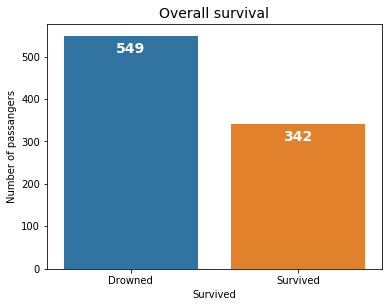

In [20]:
# number of people who survived
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = train_set_cpy )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Overall survival' , fontsize=14)
plt.ylabel('Number of passangers')
# calculate passengers for each category
labels = (train_set_cpy["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-40 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')


In [21]:
train_set_cpy["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

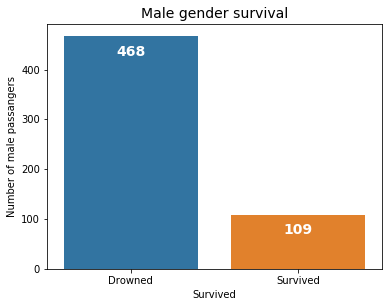

In [22]:
# number of males who survived 
target1 = train_set.loc[(train_set["Sex"] == "male")]
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = target1 )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Male gender survival' , fontsize=14)
plt.ylabel('Number of male passangers')
# calculate passengers for each category
labels = (target1["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-40 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')


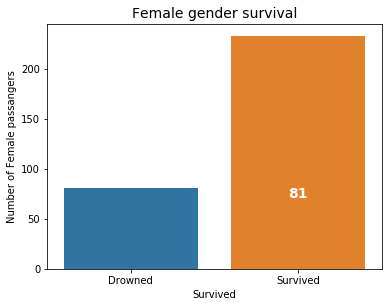

In [23]:
# number of females who survived 
target2 = train_set.loc[(train_set["Sex"] == "female")]
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = target2 )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Female gender survival' , fontsize=14)
plt.ylabel('Number of Female passangers')
# calculate passengers for each category
labels = (target2["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-10 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')

Text(0, 0.5, 'Frequency')

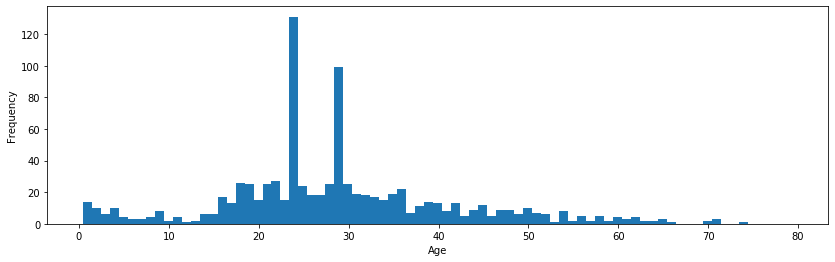

In [24]:
# Age distribuation 
fig , ax = plt.subplots(figsize=(14,4))
ax.hist(x = train_set['Age'], bins = np.arange(train_set['Age'].min() , train_set['Age'].max()) )
ax.yaxis.tick_left()
plt.xlabel('Age')
plt.ylabel('Frequency')

In [25]:
train_set['Age'].describe()

count    891.000000
mean      28.999068
std       13.124538
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

([<matplotlib.axis.YTick at 0x7f917a26e910>,
 <a list of 2 Text yticklabel objects>)

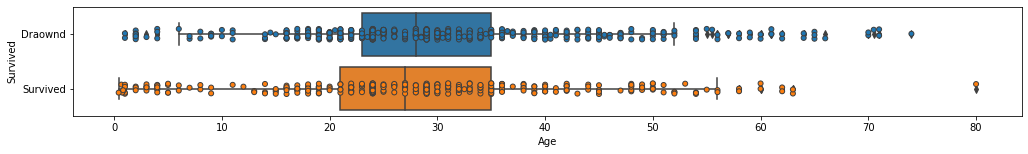

In [26]:
# Surviving by age
plt.subplots(figsize=(17,2))
sns.boxplot(x = 'Age' , y = 'Survived', data = train_set , orient = 'h' )
sns.stripplot(x = 'Age' , y = 'Survived', data = train_set , linewidth = 1, orient = 'h' )
plt.yticks(np.arange(2), ['Draownd','Survived'])


In [27]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
for x in train_set_x :
    print('Survival Correlation by:', x)
    print(train_set_cpy[[x,Target[0]]].groupby(x).mean())
    print('-'*10, '\n')


Survival Correlation by: Pclass
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
---------- 

Survival Correlation by: Sex
        Survived
Sex             
female  0.742038
male    0.188908
---------- 

Survival Correlation by: Age
       Survived
Age            
0.42        1.0
0.67        1.0
0.75        1.0
0.83        1.0
0.92        1.0
...         ...
70.00       0.0
70.50       0.0
71.00       0.0
74.00       0.0
80.00       1.0

[88 rows x 1 columns]
---------- 

Survival Correlation by: SibSp
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
---------- 

Survival Correlation by: Parch
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
---------- 

Survival Correlation by: Embarked
          Survived
Embarked          
C         0.553571
Q         0.389610
S

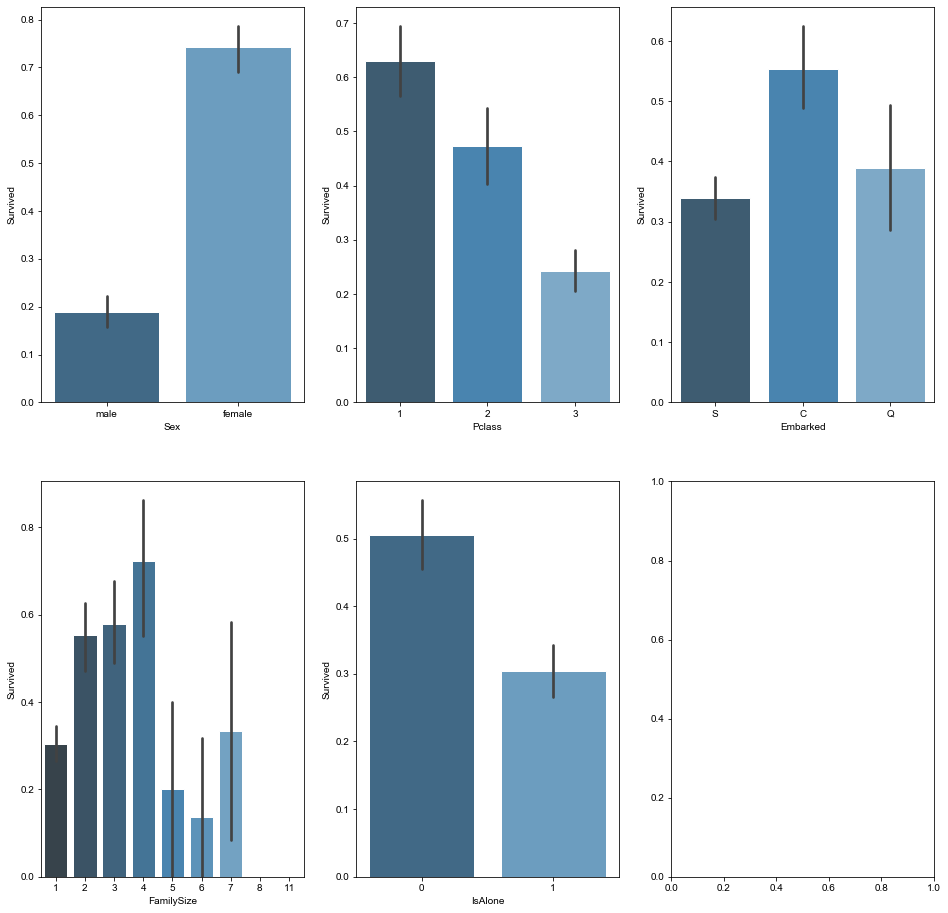

In [28]:
# Seaborn graphics for multi-variables comparison : https://seaborn.pydata.org/api.html
fig , axs = plt.subplots(2,3,figsize=(16,16))
sns.set(style="whitegrid")
sns.barplot(x = 'Sex', y = 'Survived', data = train_set_cpy , ax = axs[0,0] , palette="Blues_d")
sns.barplot(x = 'Pclass', y = 'Survived', data = train_set_cpy , ax = axs[0,1] , palette="Blues_d")
sns.barplot(x = 'Embarked', y = 'Survived', data = train_set_cpy , ax = axs[0,2] , palette="Blues_d")
sns.barplot(x = 'FamilySize', y = 'Survived', data = train_set_cpy , ax = axs[1,0] , palette="Blues_d")
sns.barplot(x = 'IsAlone', y = 'Survived', data = train_set_cpy , ax = axs[1,1] , palette="Blues_d")


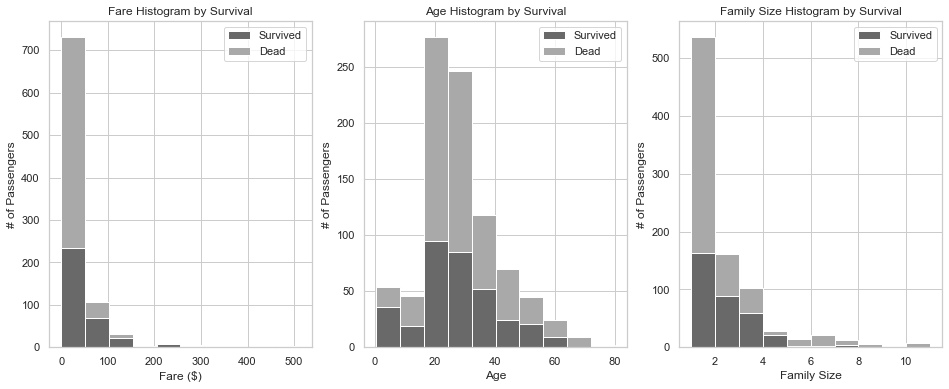

In [29]:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

plt.figure(figsize=(16,6))





plt.subplot(131)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['Fare'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['Fare']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()




plt.subplot(132)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['Age'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['Age']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()




plt.subplot(133)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['FamilySize'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['FamilySize']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')
plt.legend()

Text(0.5, 1.0, 'Sex vs Embarked Survival Comparison')

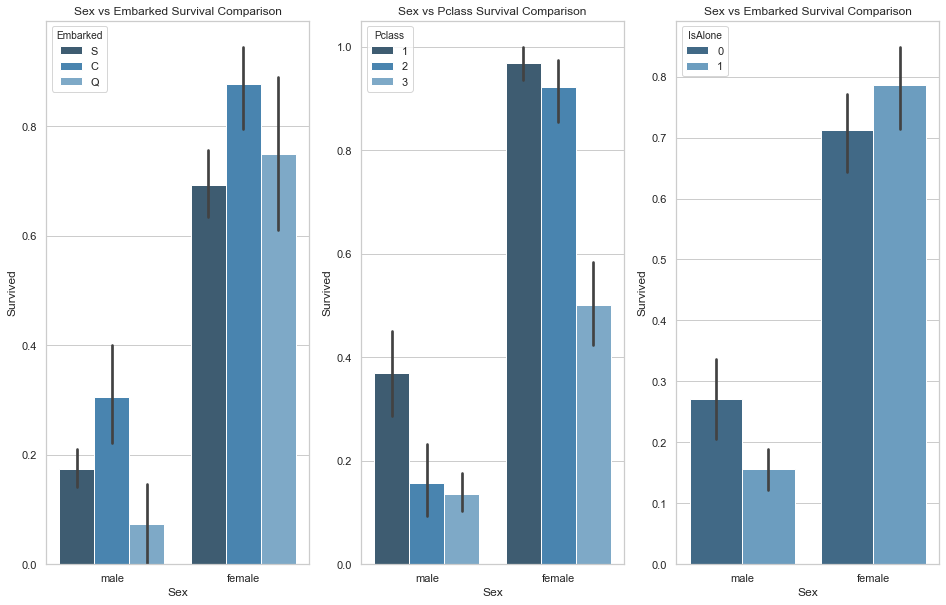

In [30]:
#graph distribution of qualitative data: Sex

# Seaborn graphics for multi-variables comparison : https://seaborn.pydata.org/api.html
fig , axs = plt.subplots(1,3,figsize=(16,10))
sns.set(style="whitegrid")


sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked' , data = train_set_cpy , ax = axs[0] , palette="Blues_d")
axs[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass' , data = train_set_cpy , ax = axs[1] , palette="Blues_d")
axs[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone' , data = train_set_cpy , ax = axs[2] , palette="Blues_d")
axs[2].set_title('Sex vs Embarked Survival Comparison')

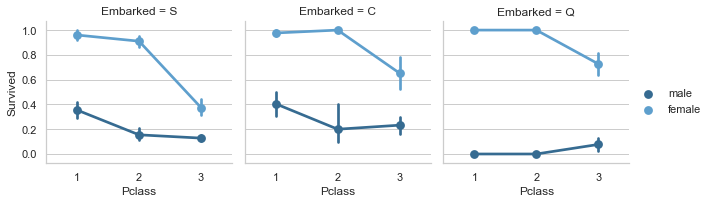

In [31]:
#graph distribution comparing embarked port with sex and survival factor 

#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#https://seaborn.pydata.org/generated/seaborn.pointplot.html


fig = g = sns.FacetGrid(train_set_cpy, col="Embarked")
fig.map(sns.pointplot , 'Pclass' , 'Survived', 'Sex', ci = 78 , palette="Blues_d", order = [1,2,3] , hue_order = ['male','female'])
fig.add_legend()

# Training and Testing ML algorithms
Machine Learning Algorithm (MLA) to test best preformance

In [20]:

# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

MLAs = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(dual = False),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
    
    # THE BELOW MODELS WERE NOT USED DUE TO A WARRING (warnings.warn("Variables are collinear"))
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis()
    
    
]

In [21]:
#split dataset in cross-validation  
# To learn more : https://www.notion.so/Journey-To-Machine-Learning-What-I-went-through-and-learned-d5233e619398454097719c4233b003b9#139fc13a38e149d19927a4e1bdef3cd9
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

# run model 10x with 60/30 split 

cross_validator_split = model_selection.ShuffleSplit(n_splits = 10,
                                     test_size = .3,
                                     train_size = .6,
                                     random_state = 0 ) 



In [22]:
# table to compare the results of each algorithm 
MLAs_columns = ['MLA Name',
                'MLA Parameters',
                'MLA Train Accuracy Mean', 
                'MLA Test Accuracy Mean', 
                'MLA Time']

MLAs_comparison = pd.DataFrame( columns = MLAs_columns )

# the below table to compare the prediction results 
MLAs_predict = train_set_cpy[Target]



In [23]:
MLAs_predict.info()
MLAs_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MLA Name                 0 non-null      object
 1   MLA Parameters           0 non-null      object
 2   MLA Train Accuracy Mean  0 non-null      object
 3   MLA Test Accuracy Mean   0 non-null      object
 4   MLA Time                 0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [24]:
train_set_cpy[train_x_bins]

,Pclass,Sex_Code,Age_Code,SibSp,Parch,Embarked_Code,FamilySize,IsAlone
0,3,1,1,1,0,2,2,0
1,1,0,2,1,0,0,2,0
2,3,0,1,0,0,2,1,1
3,1,0,2,1,0,2,2,0
4,3,1,2,0,0,2,1,1
...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,2,1,1
887,1,0,1,0,0,2,1,1
888,3,0,1,1,2,2,4,0
889,1,1,1,0,0,0,1,1


In [25]:
# indexing through the MLAs and save thier performance results

# score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

row_index = 0


for alg in MLAs :
    MLA_Name = alg.__class__.__name__
    MLAs_comparison.loc[row_index, 'MLA Name'] = MLA_Name
    MLAs_comparison.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    cv_results = model_selection.cross_validate(alg,
                                                train_set_cpy[train_x_bins],
                                                train_set_cpy[Target].values.ravel(),
                                                cv  = cross_validator_split, 
                                                return_train_score = True)
    
    
    
    MLAs_comparison.loc[row_index,'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLAs_comparison.loc[row_index,'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLAs_comparison.loc[row_index,'MLA Time'] = cv_results['fit_time'].mean()
    
    
    
    # now we run the algorithm and save the result of the predictions 
    alg.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())
    MLAs_predict[MLA_Name] = alg.predict(train_set_cpy[train_x_bins])
    
    
    
    row_index += 1
    
    




/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [26]:
MLAs_predict

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
888,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0
889,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0


In [27]:
MLAs_comparison.sort_values( by = ['MLA Test Accuracy Mean'] , ascending = False, inplace = True )
MLAs_comparison

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.856554,0.812687,0.0648491
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.824345,0.812313,0.0299066
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.826966,0.81194,0.0240595
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.805431,0.802612,0.174331
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.874906,0.802239,0.0985671
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.803558,0.800746,0.00165575
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.857303,0.799254,0.0543285
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.874906,0.798881,0.129361
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.814045,0.798134,0.065215
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.874906,0.795896,0.00137918


In [28]:
for inx in range(1,len(MLAs)) :
    print(MLAs_comparison.loc[inx,'MLA Name']," : \n")
    print(MLAs_comparison.loc[inx,'MLA Parameters'],'\n\n')

BaggingClassifier  : 

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 


ExtraTreesClassifier  : 

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 


GradientBoostingClassifier  : 

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_spli

# Decision tree model 
The follwoing steps are from a tutorial  notebook : [How-to Create Your Own Model](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook#5.1-Evaluate-Model-Performance)

In [29]:
females = train_set_cpy[train_set_cpy.Sex=='female'].groupby(['Sex','Pclass', 'Embarked'])['Survived'].mean()
print('Decision Tree starting from female Node: \n',females)


males = train_set_cpy[train_set_cpy.Sex=='male'].groupby(['Sex','Pclass', 'Embarked'])['Survived'].mean()
print('\n\nDecision Tree starting from male Node: \n',males)

Decision Tree starting from female Node: 
 Sex     Pclass  Embarked
female  1       C           0.976744
                Q           1.000000
                S           0.960000
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.375000
Name: Survived, dtype: float64


Decision Tree starting from male Node: 
 Sex   Pclass  Embarked
male  1       C           0.404762
              Q           0.000000
              S           0.354430
      2       C           0.200000
              Q           0.000000
              S           0.154639
      3       C           0.232558
              Q           0.076923
              S           0.128302
Name: Survived, dtype: float64


In [30]:
#handmade data model by https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3 Female - Class and Question 4 Embarked gain minimum information
        
        
    return Model



In [31]:
#model data
Tree_Predict = mytree(train_set_cpy)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(train_set_cpy['Survived'], Tree_Predict)*100))


#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
print(metrics.classification_report(train_set_cpy['Survived'], Tree_Predict))



Decision Tree Model Accuracy/Precision Score: 78.68%

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



### [What's recall score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
### [What's F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [32]:
Tree_Predict

,Predict
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,1.0
889,0.0


## Plot Accuracy Summary
Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
### What does balanced or normalized confusion matrices means ?
[Resource](https://www.sciencedirect.com/topics/computer-science/confusion-matrix#:~:text=4.7%20Confusion%20matrix%20patterns&text=The%20%E2%80%9Cnormalized%E2%80%9D%20term%20means%20that,topic%2C%20cluster%2C%20or%20class.) 
<br>The “balanced” term means that each class, cluster, or topic has the same number of samples. The “normalized” term means that each of these groupings is represented as having 1.00 samples. 

In [33]:

def plot_confusion_matrix( cnfm , 
                         classes,
                         normalize = False,
                         title = 'Confusion matrix',
                         cmap = plt.cm.Greys):
    if normalize :
        # convert int to float 
        # get the sum of the predictions weather correct or not 
        # divide cnfm by the sum
        cnfm = cnfm.astype('float') / cnfm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else :
        print("Confusion matrix, without normalization")
        
    print(cnfm)
    
    plt.imshow(cnfm,cmap=cmap)
    plt.title(title)
    plt.xticks(np.arange(len(classes)),classes)
    plt.yticks(np.arange(len(classes)),classes)
    plt.colorbar()
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    fmt = '.2f' if normalize else 'd'
    for i , j in itertools.product(range(cnfm.shape[0]),range(cnfm.shape[1])):
        plt.text(i,j,format(cnfm[i,j],fmt), horizontalalignment='center',color='red')

Confusion matrix, without normalization
[[468  81]
 [109 233]]
Normalized confusion matrix
[[0.85245902 0.14754098]
 [0.31871345 0.68128655]]


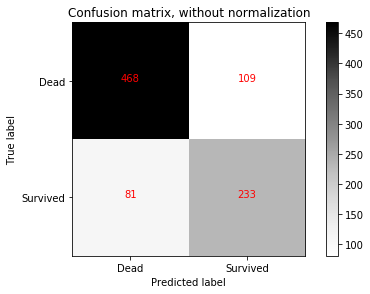

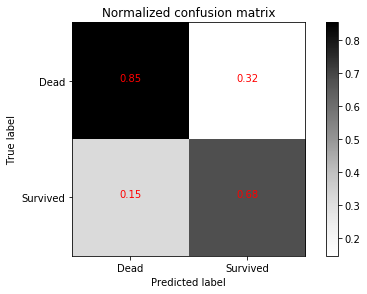

In [34]:
# Compute confusion matrix to evaluate the accuracy of a classification
# Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true 
# label being i-th class and prediced label being j-th class.
cnf_matrix = metrics.confusion_matrix(train_set_cpy['Survived'], Tree_Predict)


plt.figure()
plot_confusion_matrix(cnf_matrix,['Dead','Survived'],title="Confusion matrix, without normalization")


plt.figure()
plot_confusion_matrix(cnf_matrix,['Dead','Survived'],normalize=True,title="Normalized confusion matrix")

# Tune Model with Hyper-Parameters
- [very useful link that explains tuning the hyper-parameters](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
- [Parameter estimation using grid search with cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)

In [35]:
dtree = tree.DecisionTreeClassifier(random_state=0)

model_results = model_selection.cross_validate(dtree,
                                                train_set_cpy[train_x_bins],
                                                train_set_cpy[Target],
                                                cv  = cross_validator_split,
                                               return_train_score = True)


dtree.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training score mean: {:.2f}". format(model_results['train_score'].mean()*100)) 
print("BEFORE DT Test score mean: {:.2f}". format(model_results['test_score'].mean()*100))

print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training score mean: 87.49
BEFORE DT Test score mean: 79.55
----------


In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2,4,6,8,10,None],
              'min_samples_split': [2,5,10,.03,.05],
              'min_samples_leaf': [1,5,10,.03,.05],
              'max_features': [None, 'auto','log2','sqrt'],
              'random_state': [0]}



__scoring methodology__; two supported formulas for calculating information gain - default is gini.
<br>
__splitting methodology__; two supported strategies - default is best.
<br>
__max depth__ tree can grow; default is none.
<br>
__min_samples_split__ The minimum number of samples required to split an internal node; default is 2.
<br>
__min_samples_leaf__ The minimum number of samples required to be at a leaf node.; default is 1.
<br>
__max features__ The number of features to consider when looking for the best split; default none.
<br>
seed or control __random number generator__: https://www.quora.com/What-is-seed-in-random-number-generation

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html
print(list(model_selection.ParameterGrid(param_grid)))

[{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 0, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 0, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 0.03,

In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                          param_grid=param_grid,
                                          scoring = 'roc_auc',
                                          cv = cross_validator_split,
                                         return_train_score = True)

tune_model.fit(train_set_cpy[train_x_bins],train_set_cpy[Target])
#print(tune_model.cv_results_.keys())
#print('-'*10)
#print(tune_model.cv_results_['params'])



print('AFTER DT Parameters: ', tune_model.best_params_)
print(tune_model.cv_results_['mean_train_score'])
print('-'*10)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print(tune_model.cv_results_['mean_test_score'])
print('-'*10)
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
[0.83097387 0.81070758 0.83097387 ... 0.81268659 0.84440326 0.81268659]
----------
AFTER DT Training w/bin score mean: 88.48
[0.82272128 0.79557648 0.82272128 ... 0.81062732 0.8293527  0.81062732]
----------
AFTER DT Test w/bin score mean: 86.56
----------


# Tune Model with Feature Selection
' The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.'
- [What's feature selection](https://en.wikipedia.org/wiki/Feature_selection) <br>
- [sklearn.feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- [How to choose a feature selection algorithm](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/#:~:text=Feature%20Selection%3A%20Select%20a%20subset,(e.g.%20remove%20redundant%20variables).&text=Supervised%3A%20Use%20the%20target%20variable,well%2Dperforming%20subsets%20of%20features.)

In [37]:
print('BEFORE DT Feature selection Training Shape Old: ', train_set_cpy[train_x_bins].shape) 
print('BEFORE DT Feature selection Training Columns Old: ', train_set_cpy[train_x_bins].columns.values)
print('-'*10)
print("BEFORE DT Feature selection Training w/bin score mean: {:.2f}". format(model_results['train_score'].mean()*100)) 
print("BEFORE DT Feature selection Test w/bin score mean: {:.2f}". format(model_results['test_score'].mean()*100))

BEFORE DT Feature selection Training Shape Old:  (891, 8)
BEFORE DT Feature selection Training Columns Old:  ['Pclass' 'Sex_Code' 'Age_Code' 'SibSp' 'Parch' 'Embarked_Code'
 'FamilySize' 'IsAlone']
----------
BEFORE DT Feature selection Training w/bin score mean: 87.49
BEFORE DT Feature selection Test w/bin score mean: 79.55


In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV
dtree_featureSelection = feature_selection.RFECV(dtree,
                                  step = 1,
                                  cv = cross_validator_split,
                                  scoring = 'accuracy' )

dtree_featureSelection.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())

print( dtree_featureSelection.get_support())
print('-'*10)
X_dtree_fs = train_set_cpy[train_x_bins].columns.values[dtree_featureSelection.get_support()]
dtree_featureSelection_results = model_selection.cross_validate(dtree,
                                                                train_set_cpy[X_dtree_fs],
                                                                train_set_cpy[Target],
                                                                cv  = cross_validator_split,
                                                               return_train_score = True)


print("Optimal number of features: \n {} \n model grid scores: \n {} \n".format(dtree_featureSelection.n_features_,dtree_featureSelection.grid_scores_))

print('AFTER DT Feature selection Training New Shape : ', train_set_cpy[X_dtree_fs].shape) 
print('AFTER DT Feature selection Training New Columns: ', train_set_cpy[X_dtree_fs].columns.values)
print('-'*10)
print("AFTER DT Feature selection Training w/bin score mean: {:.2f}". format(dtree_featureSelection_results['train_score'].mean()*100)) 
print("AFTER DT Feature selection Test w/bin score mean: {:.2f}". format(dtree_featureSelection_results['test_score'].mean()*100))


featureSelection_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                          param_grid=param_grid,
                                          scoring = 'roc_auc',
                                          cv = cross_validator_split,
                                         return_train_score = True)

featureSelection_tune_model.fit(train_set_cpy[X_dtree_fs],train_set_cpy[Target])

print('AFTER DT Parameters: ', featureSelection_tune_model.best_params_)
print(featureSelection_tune_model.cv_results_['mean_train_score'])
print('-'*10)
print("AFTER DT Training w/bin score mean: {:.2f}". format(featureSelection_tune_model.cv_results_['mean_train_score'][featureSelection_tune_model.best_index_]*100)) 
print(featureSelection_tune_model.cv_results_['mean_test_score'])
print('-'*10)
print("AFTER DT Test w/bin score mean: {:.2f}". format(featureSelection_tune_model.cv_results_['mean_test_score'][featureSelection_tune_model.best_index_]*100))
print('-'*10)

[ True  True  True  True  True  True  True False]
----------
Optimal number of features: 
 7 
 model grid scores: 
 [0.7880597  0.78320896 0.79552239 0.79626866 0.79402985 0.79589552
 0.79626866 0.79552239] 

AFTER DT Feature selection Training New Shape :  (891, 7)
AFTER DT Feature selection Training New Columns:  ['Pclass' 'Sex_Code' 'Age_Code' 'SibSp' 'Parch' 'Embarked_Code'
 'FamilySize']
----------
AFTER DT Feature selection Training w/bin score mean: 87.49
AFTER DT Feature selection Test w/bin score mean: 79.70
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
[0.83097387 0.8128774  0.83097387 ... 0.80877483 0.78638661 0.80877483]
----------
AFTER DT Training w/bin score mean: 88.48
[0.82272128 0.80257603 0.82272128 ... 0.80178363 0.75950384 0.80178363]
----------
AFTER DT Test w/bin score mean: 86.58
----------


# Validate and Implement
- [What's Voting Classifier using sklearn](https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/)

In [39]:
estimator = [
    #Ensemble Methods
    #http://scikit-learn.org/stable/modules/ensemble.html
    ('abc',ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    
    #Gaussian Processes
    #http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM
    #http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    #('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes
    #http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    #http://scikit-learn.org/stable/modules/neighbors.html
    ('knc', neighbors.KNeighborsClassifier()),
    
    #SVM
    #http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #Trees
    ('dtc', tree.DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 4,
                                       min_samples_leaf = 5,
                                       random_state = 0 ))
    
]

### Voting Classifier before tuning hyper-parameters. 

In [40]:
# Voting Classifier with hard voting
vot_hard = ensemble.VotingClassifier(estimators = estimator, voting ='hard')

vot_hard_cv = model_selection.cross_validate(vot_hard ,
                                            train_set_cpy[train_x_bins],
                                            train_set_cpy[Target].values.ravel(),
                                            cv  = cross_validator_split,
                                            return_train_score = True)

vot_hard.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())
print("Hard Voting Training score mean: {:.2f}".format(vot_hard_cv['train_score'].mean()*100))
print("Hard Voting test score mean : {:.2f}".format(vot_hard_cv['test_score'].mean()*100))
print('-'*10)







# Voting Classifier with soft voting
vot_soft = ensemble.VotingClassifier(estimators = estimator , voting = 'soft')

vot_soft_cv = model_selection.cross_validate(vot_soft,
                                            train_set_cpy[train_x_bins],
                                            train_set_cpy[Target].values.ravel(),
                                            cv = cross_validator_split,
                                            return_train_score = True)

vot_soft.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())

print("Soft Voting Training score mean: {:.2f}".format(vot_soft_cv['train_score'].mean()*100))
print("Soft Voting test score mean : {:.2f}".format(vot_soft_cv['test_score'].mean()*100))
print('-'*10)


Hard Voting Training score mean: 85.92
Hard Voting test score mean : 81.12
----------
Soft Voting Training score mean: 86.12
Soft Voting test score mean : 81.08
----------


### Tuning hyper-parameters in FindingBestArgumentsForTheModels.ipynb file

In [ ]:
%store train_set_cpy
%store Target
%store train_x_bins
%store cross_validator_split

### setting the hyper-parameters 

In [73]:
with open('BestParams.json' , 'r') as f:
    best_params = json.load(f)


for x in best_params:
    print("%s : %s" % (x,best_params[x]))


abc : {'algorithm': 'SAMME.R', 'learning_rate': 0.03, 'n_estimators': 300, 'random_state': 0}
bc : {'max_features': 0.5, 'n_estimators': 300, 'random_state': 0}
etc : {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': 0}
gbc : {'learning_rate': 0.05, 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 0.03, 'n_estimators': 100, 'random_state': 0}
rfc : {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 300, 'oob_score': True, 'random_state': 0}
gpc : {'max_iter_predict': 10, 'random_state': 0}
bnb : {'alpha': 0.1}
gnb : {}
knc : {'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 7, 'weights': 'uniform'}
svc : {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'probability': True, 'random_state': 0}
dtc : {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}


In [78]:
for es , para in zip(estimator,best_params) :
    print(es[1].set_params(**best_params[es[0]]))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.03,
                   n_estimators=300, random_state=0)
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.5, max_samples=1.0, n_estimators=300,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=4, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,


### Voting Classifier after tuning hyper-parameters. 

In [81]:
grid_hard = ensemble.VotingClassifier(estimators = estimator , voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard ,
                                            train_set_cpy[train_x_bins],
                                            train_set_cpy[Target].values.ravel(),
                                            cv  = cross_validator_split,
                                            return_train_score = True)

grid_hard.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())
print("Hard Voting w/Tuned Hyperparameters Training score mean: {:.2f}".format(grid_hard_cv['train_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters test score mean : {:.2f}".format(grid_hard_cv['test_score'].mean()*100))
print('-'*10)













grid_soft = ensemble.VotingClassifier(estimators = estimator , voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft ,
                                            train_set_cpy[train_x_bins],
                                            train_set_cpy[Target].values.ravel(),
                                            cv  = cross_validator_split,
                                            return_train_score = True)

grid_soft.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())
print("Hard Voting w/Tuned Hyperparameters Training score mean: {:.2f}".format(grid_soft_cv['train_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters test score mean : {:.2f}".format(grid_soft_cv['test_score'].mean()*100))
print('-'*10)


Hard Voting w/Tuned Hyperparameters Training score mean: 83.99
Hard Voting w/Tuned Hyperparameters test score mean : 81.46
----------
Hard Voting w/Tuned Hyperparameters Training score mean: 83.73
Hard Voting w/Tuned Hyperparameters test score mean : 81.46
----------


# Evaluate the performance on the given test dataset 
the prevouis test dataset was a part of training dataset 

In [82]:
print(test_set.info())
print('-'*30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Ticket         418 non-null    object  
 8   Fare           418 non-null    float64 
 9   Cabin          418 non-null    object  
 10  Embarked       418 non-null    object  
 11  FamilySize     418 non-null    int64   
 12  IsAlone        418 non-null    int64   
 13  AgeBin         418 non-null    category
 14  Sex_Code       418 non-null    int64   
 15  Embarked_Code  418 non-null    int64   
 16  Age_Code       418 non-null    int64   
dtypes: category(1), float64(2), int64(9

In [83]:
test_set['Survived'] = grid_hard.predict(test_set[train_x_bins])

### Submit file - The final results of the test set - :

In [88]:
submit = test_set[['PassengerId','Survived']]
submit.to_csv("submit.csv" , index = False)



print('Validation Data Distribution: \n', test_set['Survived'].value_counts(normalize = True))
submit.sample(10)

Validation Data Distribution: 
 0    0.638756
1    0.361244
Name: Survived, dtype: float64


,PassengerId,Survived
230,1122,0
215,1107,0
102,994,0
156,1048,1
363,1255,0
378,1270,0
277,1169,0
239,1131,1
139,1031,0
262,1154,1


## Credits 
- [Titanic EDA tutorial with seaborn](https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn#5.-First-look:-variables,-NAs)
- [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
- [Decision Tree Classification in Python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)